<a href="https://colab.research.google.com/github/Zubair2019/Test1/blob/master/modelHappy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


Using TensorFlow backend.


In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))


number of training examples = 314
number of test examples = 80
X_train shape: (314, 128, 128, 3)
Y_train shape: (314, 1)
X_test shape: (80, 128, 128, 3)
Y_test shape: (80, 1)


In [0]:
def HappyModel(input_shape):

    
    ### START CODE HERE ###
# Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv1')(X)
    X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)
    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool1')(X)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
        # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool2')(X)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)

    #X = MaxPooling2D((2, 2), name='max_pool3')(X)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (5, 5), strides = (1, 1), name = 'conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (1, 1), strides = (1, 1), name = 'conv5')(X)
    X = BatchNormalization(axis = 3, name = 'bn5')(X)
    X = Activation('relu')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='HappyModel')

    return model
    
    ### END CODE HERE ###
    
    return model

In [0]:
happyModel = HappyModel(X_train.shape[1:])


In [0]:
happyModel.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [8]:
happyModel.fit(x = X_train, y = Y_train, epochs = 300, batch_size = 16)

Epoch 1/300
314/314 [==============================] - 0s 1ms/step - loss: 0.0287 - accuracy: 0.9841
Epoch 2/300
314/314 [==============================] - 0s 1ms/step - loss: 0.0105 - accuracy: 1.0000
Epoch 3/300
314/314 [==============================] - 0s 1ms/step - loss: 0.0146 - accuracy: 0.9968
Epoch 4/300
314/314 [==============================] - 0s 1ms/step - loss: 0.0194 - accuracy: 0.9873
Epoch 5/300
314/314 [==============================] - 0s 1ms/step - loss: 0.0068 - accuracy: 0.9968
Epoch 6/300
314/314 [==============================] - 0s 1ms/step - loss: 0.0088 - accuracy: 1.0000
Epoch 7/300
314/314 [==============================] - 0s 1ms/step - loss: 0.0243 - accuracy: 0.9936
Epoch 8/300
314/314 [==============================] - 0s 1ms/step - loss: 0.0285 - accuracy: 0.9873
Epoch 9/300
314/314 [==============================] - 0s 1ms/step - loss: 0.0263 - accuracy: 0.9904
Epoch 10/300
314/314 [==============================] - 0s 1ms/step - loss: 0.0231 - accura

In [9]:
preds = happyModel.evaluate(X_test, Y_test)

print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

80/80 [==============================] - 0s 598us/step

Loss = 0.10028156191110611
Test Accuracy = 0.9750000238418579


[[0.]]


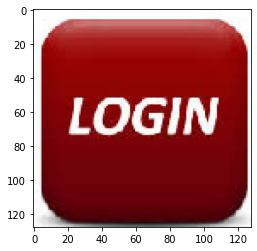

In [27]:
### START CODE HERE ###
img_path = 'login7.jpeg'
### END CODE HERE ###
img = image.load_img(img_path, target_size=(128, 128))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happyModel.predict(x))